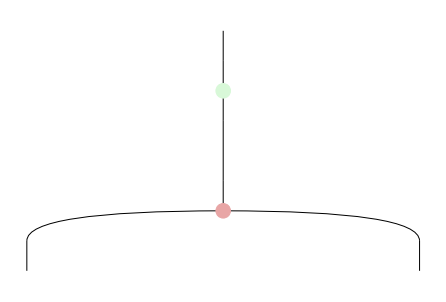

In [1]:
from discopy.quantum.zx import Z, X, Spider, Id
from discopy.tensor import Tensor, Dim
from math import pi

import numpy as np

d = Z(1, 1) >> X(1, 2)
d.draw()

In [2]:
d.eval()

AttributeError: 'Z' object has no attribute 'array'

In [9]:
Tensor(Dim(3), Dim(2), [[1, 1, 1], [2, 2, 2]])

Tensor(dom=Dim(3), cod=Dim(2), array=[1, 1, 1, 2, 2, 2])

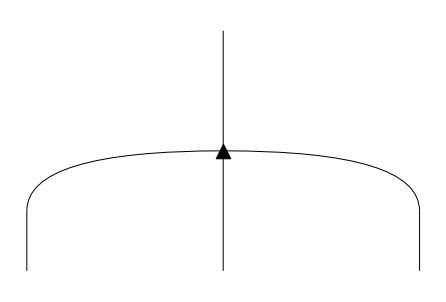

In [67]:
def one_hots(n):
    zeros = '0'*n
    strings = []
    for i in range(n):
        strings.append('0'*i + '1' + '0'*(n-i-1))
    return strings

class W(Spider):
    def __init__(self, n_out=2):
        super().__init__(1, n_out) # assume 1 in for now 
        self.color = "black" 
        self.shape = "triangle_up"
        
    @property
    def array(self):
        # |0..0><0| + (|10..> + |01..> + ...)<1|
        n = len(self.cod)
        array = np.zeros((2**n, 2), dtype=complex)
        array[0][0] = 1 # top row |00..>
        for j in one_hots(n):
            array[int(j, 2)][1] = 1 #1 for every index of 1 one hot index
        
        print(len(self.dom), len(self.cod), "\n", array)
        
        return Tensor(Dim(2), Dim(2)**n, array.flatten())
    
W(3).draw()   

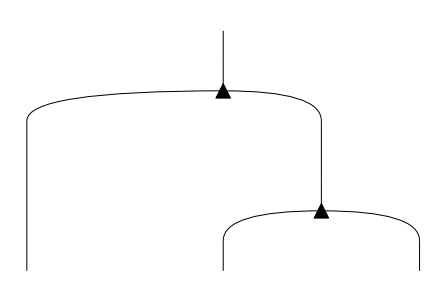

In [68]:
d = W(2) >> Id(1) @ W(2)
d.draw()

In [69]:
np.array([[1, 0], [0, 1.], [0, 1.], [0, 0.]]).flatten()

array([1., 0., 0., 1., 0., 1., 0., 0.])

In [70]:
np.zeros(1 << (1 + 3))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [72]:
import tensornetwork as tn
#W(3)#.eval(contractor=tn.contractors.auto)
W(3).eval()

1 3 
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


ValueError: cannot reshape array of size 16 into shape ()

In [50]:
W(3).to_tn()

1 3 
 [[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


AttributeError: 'Tensor' object has no attribute 'dtype'

In [16]:
g = d.to_pyzx()
from pyzx import draw as pydraw
pydraw(g)

In [23]:
d2 = Z(1, 1, 0) >> X(1, 1, 0)
d2.eval()

TypeError: Expected rigid.PRO, got tensor.Dim instead.

In [21]:
g2 = d2.to_pyzx()
pydraw(g2)